### ***Import Libaries***

In [ ]:
import numpy as np
import tensorflow as tf
import numpy as np
import tkinter as tk
import time
import random
from Fire_Fighter_Env import FireFighterEnv, FireGameUI  
import matplotlib.pyplot as plt
from Fire_Fighter_Env import FireFighterEnv
from DQN_model import DQN

### ***Train DQN Model***

In [6]:
# Initialize environment
env = FireFighterEnv()
state_size = (env.size[0], env.size[1])
action_size = 4

# Initialize model
num_episodes = 100
num_timesteps = 200
batch_size = 32
dqn = DQN(state_size, action_size, use_cnn=False)

# Training variables
rewards_history = []
time_step = 0

for episode in range(num_episodes):
    state = env.reset() 
    # state = state['grid']
    total_reward = 0
    steps_since_last_train = 0  

    for t in range(num_timesteps):
        time_step += 1

        if time_step % dqn.update_rate == 0:
            dqn.update_target_network()
        
        action = dqn.epsilon_greedy(state)
        next_state, reward, done, _ = env.step(action)
        # next_state = next_state['grid']
        
        dqn.store_transition(state, action, reward, next_state, done)
        steps_since_last_train += 1  #

        # Train after every 32 steps
        if steps_since_last_train == batch_size:
            dqn.train(batch_size)
            steps_since_last_train = 0 

        state = next_state
        total_reward += reward

        if done:
            break

    dqn.save_best_weights(total_reward)
    rewards_history.append(total_reward)
    print(f"Episode {episode}, Total Reward: {total_reward}, Avg Loss: {dqn.loss_history[-1] if dqn.loss_history else 0}")

dqn.save_final_model()


update best weights -1043
Episode 0, Total Reward: -1043, Avg Loss: 191.1673583984375
update best weights -930
Episode 1, Total Reward: -930, Avg Loss: 38.806175231933594
Episode 2, Total Reward: -998, Avg Loss: 3.309607982635498
Episode 3, Total Reward: -936, Avg Loss: 55.33055877685547
update best weights -791
Episode 4, Total Reward: -791, Avg Loss: 117.63480377197266
Episode 5, Total Reward: -1171, Avg Loss: 179.79632568359375
Episode 6, Total Reward: -1142, Avg Loss: 172.31610107421875
Episode 7, Total Reward: -1106, Avg Loss: 121.35530090332031
Episode 8, Total Reward: -1068, Avg Loss: 187.88253784179688
Episode 9, Total Reward: -1160, Avg Loss: 235.57998657226562
Episode 10, Total Reward: -987, Avg Loss: 67.78437805175781
Episode 11, Total Reward: -1014, Avg Loss: 168.74053955078125
Episode 12, Total Reward: -1199, Avg Loss: 103.33888244628906
Episode 13, Total Reward: -1321, Avg Loss: 104.874267578125
Episode 14, Total Reward: -1035, Avg Loss: 80.39437103271484
Episode 15, Tota

### ***Show Results***

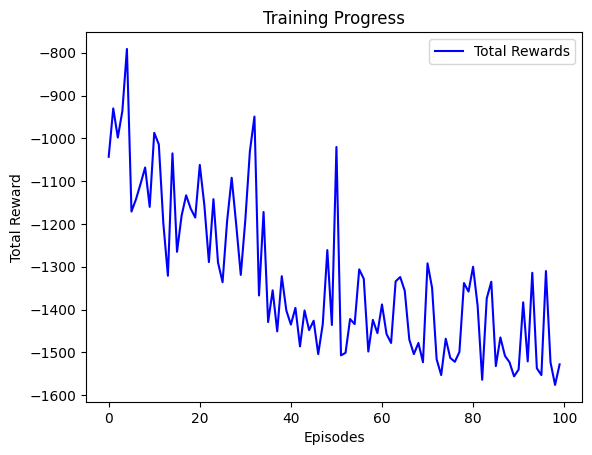

In [7]:
# Plot training rewards
def plot_training(rewards):
    plt.plot(rewards, 'b-', label='Total Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Training Progress')
    plt.legend()
    plt.show()

plot_training(rewards_history)

In [8]:
average_reward = np.mean(rewards_history)
variance_reward = np.std(rewards_history)

print(f"Average Reward: {average_reward} ± {variance_reward}")


Average Reward: -1327.53 ± 180.28213749564875


### ***Run environment using best DQN weighs***

In [ ]:
model = tf.keras.models.load_model("Best_DQN_Model_copy.keras")

env = FireFighterEnv(size=9, fire_spawn_delay=10, max_steps=200)

root = tk.Tk()
ui = FireGameUI(root, env)

state = env.reset()
# state = state['grid']
done = False


epsilon = 0.5

def run_episode():
    global state, done
    if not done:
        
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)
        else:
            Q_values = model.predict(np.expand_dims(state, axis=0), verbose=0)
            action = np.argmax(Q_values[0])

        next_state, reward, done, _ = env.step(action)
        # next_state = next_state['grid']

        state = next_state
        ui.render(action)

    
    root.after(1000, run_episode)  

root.after(0, run_episode)
root.mainloop()

